In [1]:
%matplotlib inline

In [2]:
import stream as st
import scanpy as sc
import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd
import os

#from src.core import stream_plot_gene,subwaymap_plot_gene

/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
st.__version__

'0.4.1'

In [12]:
adata=st.read("./stream_result/BC/adata.h5ad",file_format="h5ad")

Using default working directory.
Saving results in: /home/ye/Work/Python/SingleCell/Project/stream/stream_result


In [14]:
st.add_cell_labels(adata,file_name="./stream_result/BC/cell_label.tsv")
st.add_cell_colors(adata,file_name="./stream_result/BC/cell_label_color.tsv")

In [16]:
st.filter_genes(adata,min_num_cells = 5)

Filter genes based on min_num_cells
After filtering out low-expressed genes: 
16651 cells, 16064 genes


using all the genes ...
20 PCs are selected


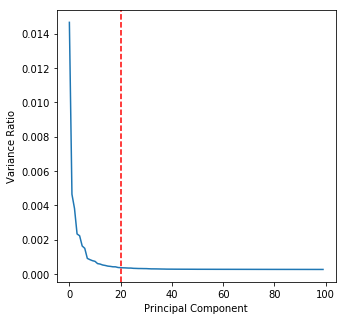

In [17]:
st.select_top_principal_components(adata,n_pc=20,first_pc=True)

500 variable genes are selected


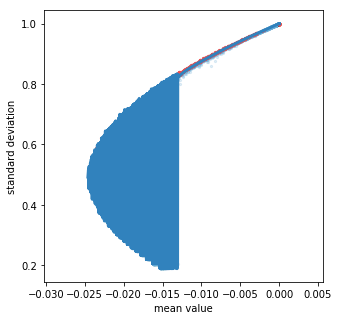

In [19]:
st.select_variable_genes(adata,n_genes=500)

In [20]:
st.dimension_reduction(adata,n_neighbors=20,n_components=2,n_jobs=8,method="se",feature="top_pcs")

feature top_pcs is being used ...
8 cpus are being used ...


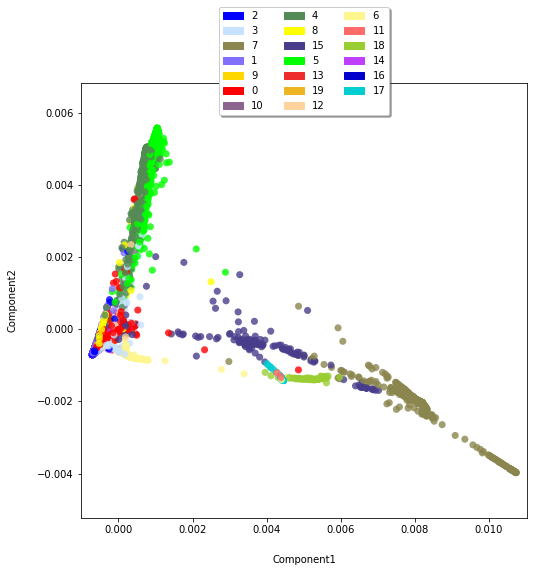

In [21]:
st.plot_dimension_reduction(adata)

In [22]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


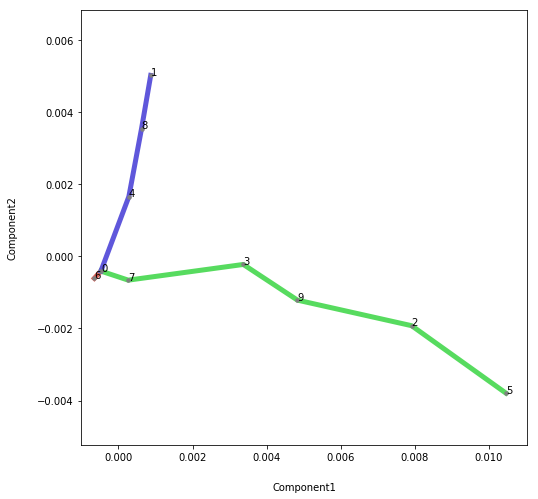

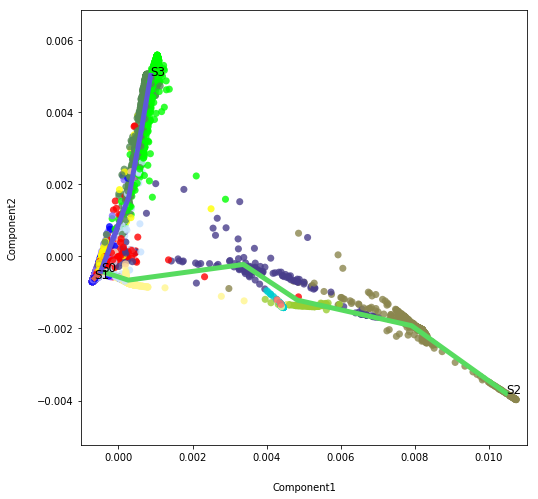

In [23]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata,fig_legend=False)

In [24]:
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.02)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 16651 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
1.47e-07
	
50
	
49
	
46
	
1
	
0
	
0
	
3.611e-08
	
3.373e-08
	
0.9943
	
0.9946
	
1.051e-07
	
5.794e-09
	
2.897e-07
	
1.448e-05
	
0


163.38 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


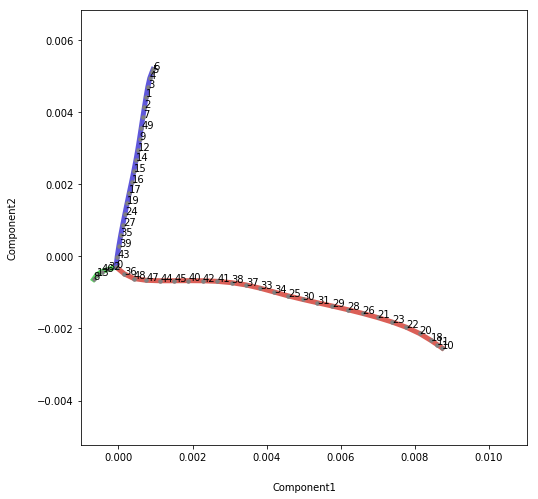

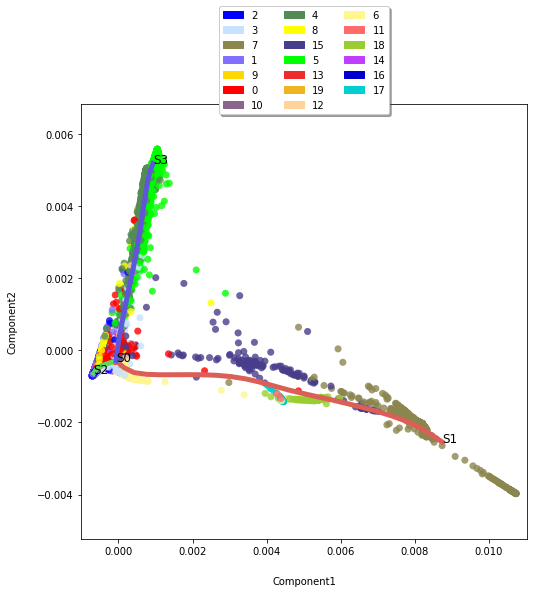

In [25]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 80 nodes on 16651 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||80
	
5.986e-08
	
80
	
79
	
76
	
1
	
0
	
0
	
1.529e-08
	
1.362e-08
	
0.9976
	
0.9978
	
4.164e-08
	
2.924e-09
	
2.339e-07
	
1.871e-05
	
0


24.238 sec elapsed

Number of branches after optimizing branching: 3


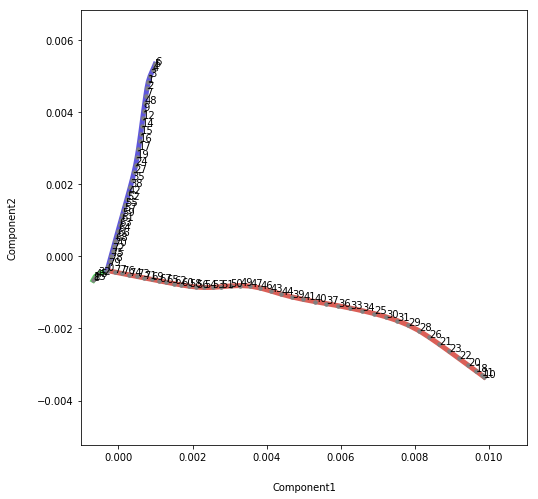

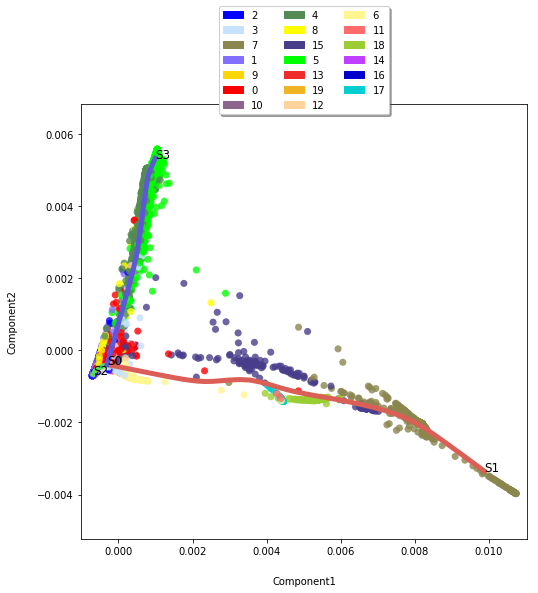

In [26]:
st.optimize_branching(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.01)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


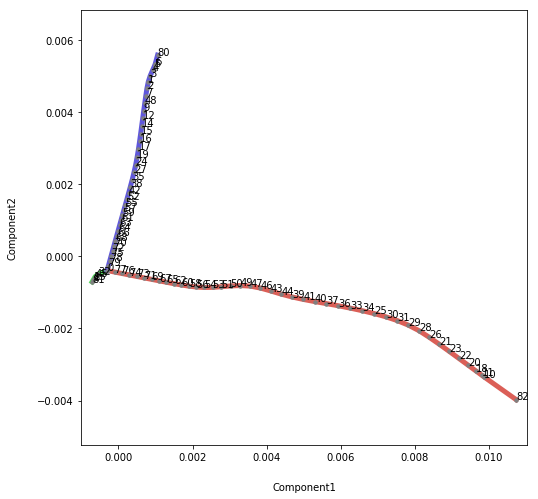

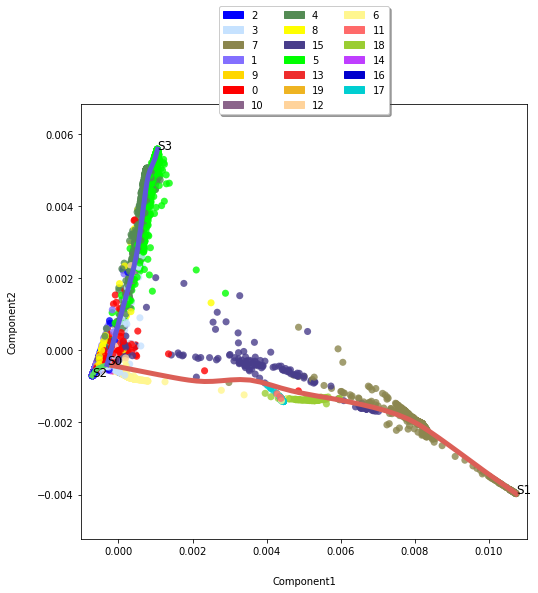

In [27]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


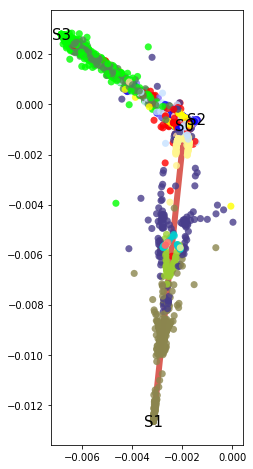

In [28]:
st.plot_flat_tree(adata,fig_legend=False)

In [3]:
#adata=st.read("stream_result/BC/stream_result.pkl",file_format="pkl",workdir="stream_result/BC")

Saving results in: stream_result/BC


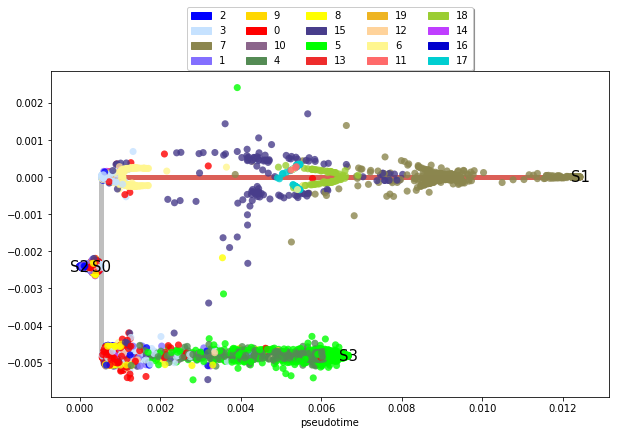

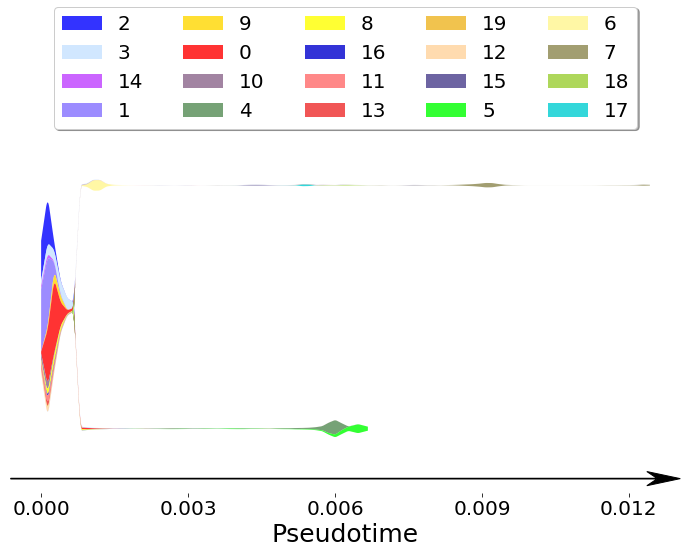

In [38]:
st.subwaymap_plot(adata,root='S2',fig_legend_ncol=5,percentile_dist=100) 
st.stream_plot(adata,root='S2',fig_legend_ncol=5,fig_size=(12,12))

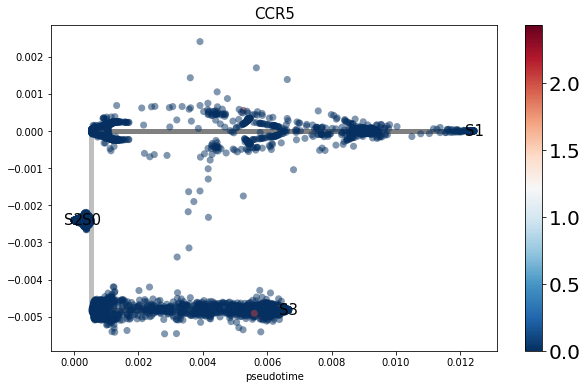

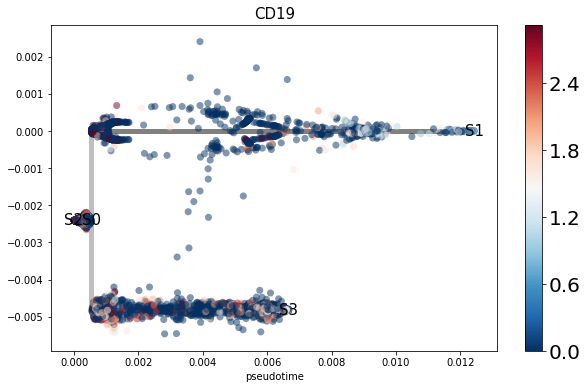

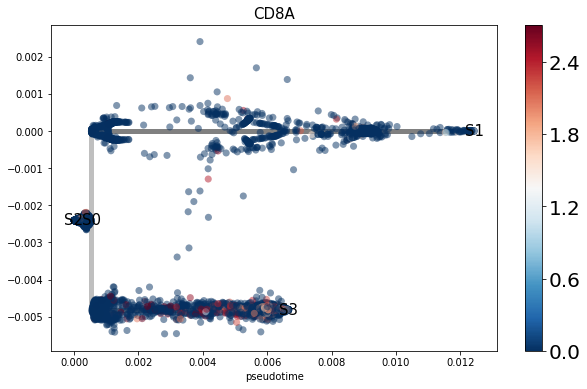

In [6]:
subwaymap_plot_gene(adata,percentile_dist=100,root='S2',genes=["CD8A","CD19","CCR5"])  # motified by myself

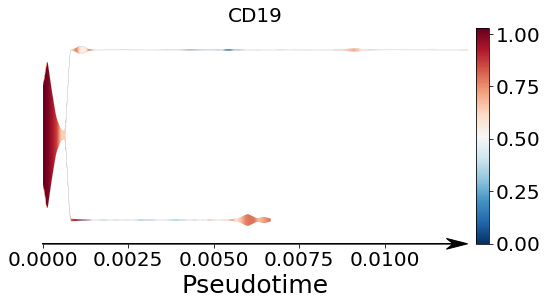

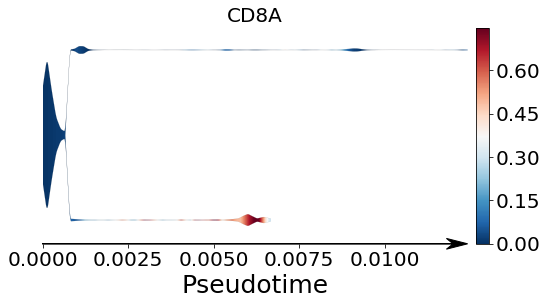

In [7]:
#st.write(adata,file_name='stream_result.pkl')
stream_plot_gene(adata,root='S2',fig_size=(8,8),genes=['CD8A','CD19'])

In [ ]:
detect_transistion_genes(adata,root='S2')

Filtering out genes that are expressed in less than 5 cells ...
1 cpus are being used ...
16064 genes are being scanned ...


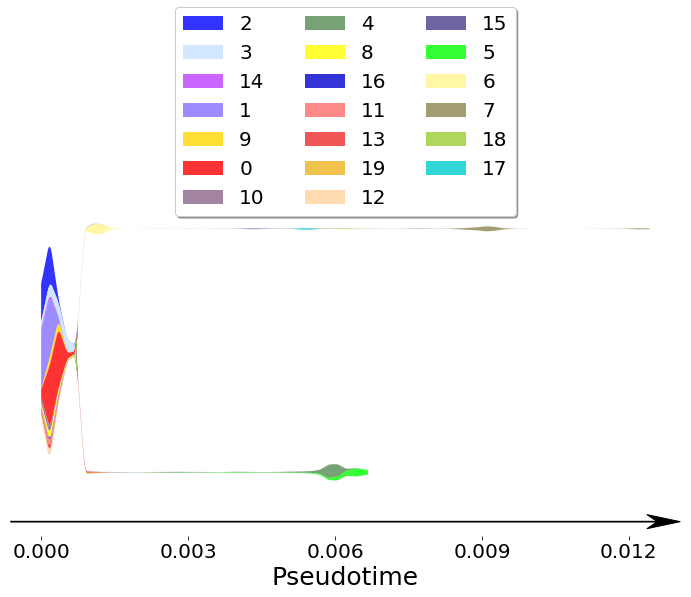

In [8]:
st.stream_plot(adata,root='S2',preference=['S1','S0'],factor_min_win=1.5)

In [ ]:
from src.core import detect_de_genes,detect_leaf_genes
detect_leaf_genes(adata,root='S0',cutoff_zscore=1.0)

Filtering out genes that are expressed in less than 5 cells ...
1 cpus are being used ...
16064 genes are being scanned ...
